In [18]:
import pandas as pd # Library for data handling
import numpy as np # matrix operations
import geopandas as gpd
import matplotlib.pyplot as plt

# Assignment 4


Please do not change, delete or edit any cells. Write your code in between designated lines.

## Question 1 (25 points)

In [19]:
# Please go to Palette_training_4 GitHub repo and 
# 1. Read Sask_RM_data.csv.
# 2. Rename column namse Crop Year, Canola - bu/ac, Spring Wheat - bu/ac with
# Year, Canola, SpringWheat respectively.

In [20]:
# 1. Read csv file by using pandas 

## Your code here - down ##
df = pd.read_csv('./Sask_RM_Data.csv')
# Lets display a snapshot and summary
df.head()
df.info()
df
## Your code here - up ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crop Year             2950 non-null   int64  
 1   RM                    2950 non-null   int64  
 2   Canola - bu/ac        2905 non-null   float64
 3   Spring Wheat - bu/ac  2899 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 92.3 KB


,Crop Year,RM,Canola - bu/ac,Spring Wheat - bu/ac
0,2012,1,22.3,36.2
1,2012,2,28.6,37.2
2,2012,3,25.1,39.4
3,2012,4,21.6,31.6
4,2012,5,26.8,29.0
...,...,...,...,...
2945,2021,520,36.6,46.9
2946,2021,555,36.9,54.1
2947,2021,561,26.8,47.6
2948,2021,588,30.2,46.1


In [21]:
# 2. Rename columns
# Rename column namse Crop Year, Canola - bu/ac, Spring Wheat - bu/ac with
# Year, Canola, SpringWheat respectively.

## Your code here - down ##
df.rename(columns=
{
    'Crop Year': 'Year',
    'Canola - bu/ac': 'Canola',
    'Spring Wheat - bu/ac': 'SpringWheat',
}, inplace=True)

df.info()

## Your code here - up ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2950 non-null   int64  
 1   RM           2950 non-null   int64  
 2   Canola       2905 non-null   float64
 3   SpringWheat  2899 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 92.3 KB


Question 2 (65 points)

In [22]:
# 1. How many missing values in each column? 
## Your code here - down ##

df.isna().sum()

## Your code here - up ##

Year            0
RM              0
Canola         45
SpringWheat    51
dtype: int64

In [23]:
# 2. Find unique values of RMs(Rural Municipalities).

## Your code here - down ##

print('there are: ' + str(df['RM'].nunique()))
df['RM'].unique() # Series

## Your code here - up ##

there are: 295


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  17,
        18,  19,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        43,  44,  45,  46,  49,  51,  61,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141,
       142, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 171, 181, 183, 184, 185, 186,
       187, 189, 190, 191, 193, 194, 211, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232,
       241, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255,
       256, 257, 259, 260, 261, 271, 273, 274, 275, 276, 277, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 290, 292, 301, 30

In [24]:
# 3. Use groupby() and find top 10 RMs in terms of average Canola yield through 10 years.

## Your code here - down ##

query = df.groupby('RM')\
                    .mean()\
                    .sort_values('Canola', ascending=False)\
                    .reset_index()


print('Top ten RMs are:\n',query['RM'].loc[:10])
## Your code here - up ##

Top ten RMs are:
 0     271
1     470
2     439
3     303
4     338
5     493
6     440
7     464
8     410
9     434
10    399
Name: RM, dtype: int64


In [25]:
# 4. Use groupby() function and find worst 10 RMs in terms of average Spring Wheat through 10 years.

## Your code here - down ##

query2 = df.groupby('RM')\
                    .mean()\
                    .sort_values('SpringWheat', ascending=False)\
                    .reset_index()

print('Worse RMs are:\n',query2['RM'].tail(10))

# Not sure how to remove index when printing

## Your code here - up ##

Worse RMs are:
 285     70
286      9
287    101
288     51
289     19
290     40
291     45
292     69
293     10
294     44
Name: RM, dtype: int64


In [26]:
# 4. Use groupby() function and find worst 3 best years in terms of average Spring Wheat.

# I am assuminng you mean 3 best years in terms of Spring Wheat

## Your code here - down ##

query3 = df.groupby('Year')\
                    .mean()\
                    .sort_values('SpringWheat', ascending=False)\
                    .reset_index()

print(query3)

print('Top 3 best years for wheat are:\n',query3['Year'].unique()[:3])

## Your code here - up ##

   Year          RM     Canola  SpringWheat
0  2020  247.298305  38.234483    49.443357
1  2019  247.298305  40.783103    49.227431
2  2013  247.298305  38.183505    47.431525
3  2018  247.298305  36.802759    45.287847
4  2016  247.298305  42.180969    44.336458
5  2017  247.298305  33.810103    43.510767
6  2014  247.298305  32.644379    38.962945
7  2015  247.298305  36.060172    37.016599
8  2012  247.298305  24.923891    34.831633
9  2021  247.298305  21.858276    30.216725
Top 3 best years for wheat are:
 [2020 2019 2013]


In [27]:
# 5. Use groupby() function and find worst 3 years in terms of average Spring Wheat through 10 years.

## Your code here - down ##

query4 = df.groupby('Year')\
                    .mean()\
                    .sort_values('SpringWheat', ascending=False)\
                    .reset_index()


print(query4)

print('Top 3 worse years for wheat are:\n',query4['Year'].tail(3).unique())
# Hmmm not sure what the decimal value means
# I think it is because there are multiple RM for one year so it will take an average of all RMS

## Your code here - up ##

   Year          RM     Canola  SpringWheat
0  2020  247.298305  38.234483    49.443357
1  2019  247.298305  40.783103    49.227431
2  2013  247.298305  38.183505    47.431525
3  2018  247.298305  36.802759    45.287847
4  2016  247.298305  42.180969    44.336458
5  2017  247.298305  33.810103    43.510767
6  2014  247.298305  32.644379    38.962945
7  2015  247.298305  36.060172    37.016599
8  2012  247.298305  24.923891    34.831633
9  2021  247.298305  21.858276    30.216725
Top 3 worse years for wheat are:
 [2015 2012 2021]


## Question 3 (10 points)

This task is independent exploratory data analysis. Find key insights from the dataset and share your code by creating new cells.

In [28]:
## Lets find and clean up all NA 
print('The dataframe contains the following number of NA: |n', df.isna().sum())
df.dropna()

# Lets check for duplicates and delete
print('The dataframe contains the following number of duplicates: ', df.duplicated().sum())
df.drop_duplicates()


The dataframe contains the following number of NA: |n Year            0
RM              0
Canola         45
SpringWheat    51
dtype: int64
The dataframe contains the following number of duplicates:  0


,Year,RM,Canola,SpringWheat
0,2012,1,22.3,36.2
1,2012,2,28.6,37.2
2,2012,3,25.1,39.4
3,2012,4,21.6,31.6
4,2012,5,26.8,29.0
...,...,...,...,...
2945,2021,520,36.6,46.9
2946,2021,555,36.9,54.1
2947,2021,561,26.8,47.6
2948,2021,588,30.2,46.1


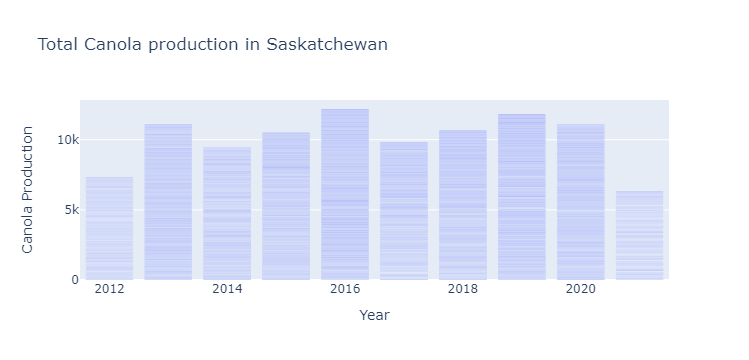

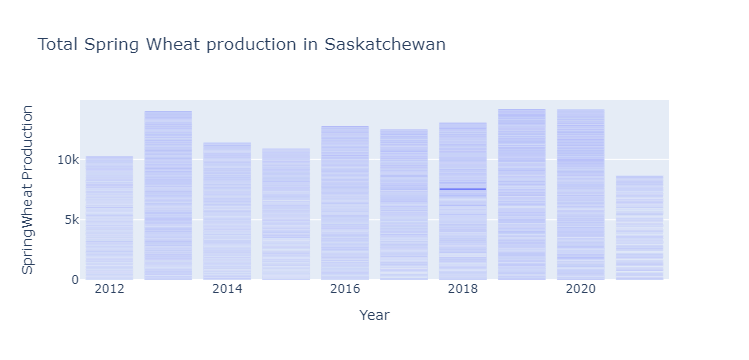

In [42]:
#Now lets make some plots

import plotly.express as px

fig = px.bar(df, x='Year', y='Canola',
             labels={
                     "Canola": "Canola Production"},
                title="Total Canola production in Saskatchewan")
fig.show()

fig = px.bar(df, x='Year', y='SpringWheat', 
             labels={
                     "SpringWheat": "SpringWheat Production" ,
                 },
                title="Total Spring Wheat production in Saskatchewan")
fig.show()

It seems that the best year for overal canola production in Saskatchewan was 2016 and the worst in 2021.

For Spring wheat we have to zoom in a bit to to find out best overal prodcution in Saskatcheawan was 2019

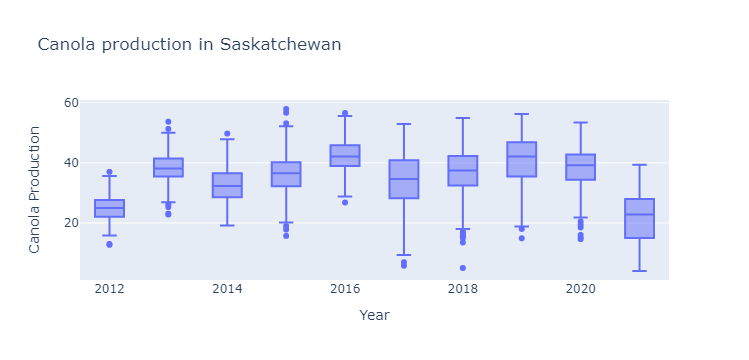

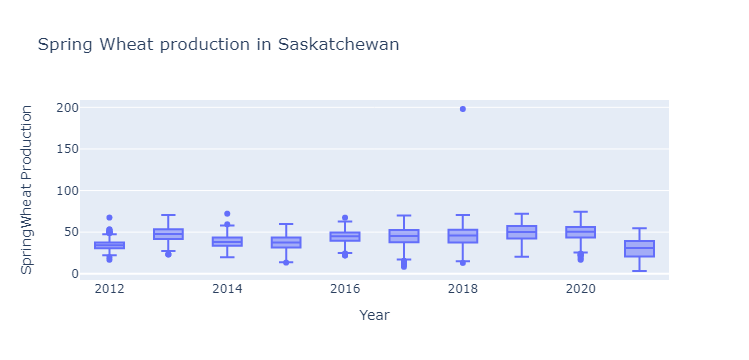

In [51]:
# Now lets look at some box plots with average data and standard deviations

fig = px.box(df, x='Year', y='Canola',
             labels={
                     "Canola": "Canola Production"},
                title="Canola production in Saskatchewan")
fig.show()

fig = px.box(df, x='Year', y='SpringWheat', 
             labels={
                     "SpringWheat": "SpringWheat Production" ,
                 },
                title="Spring Wheat production in Saskatchewan")
fig.show()

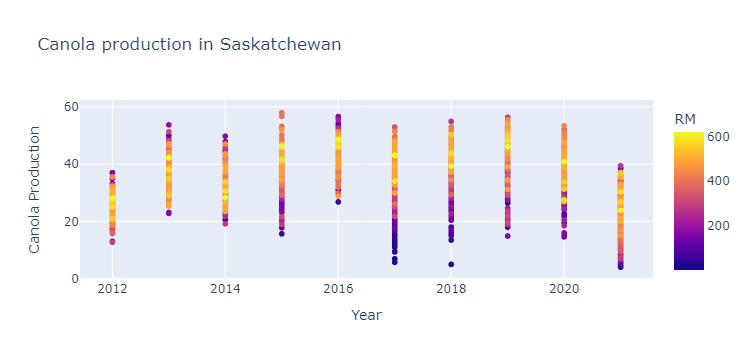

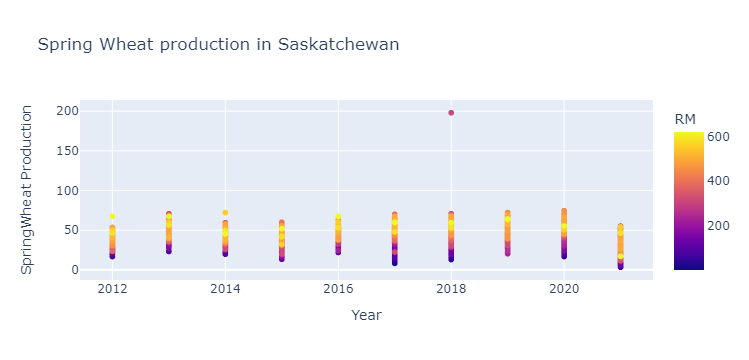

In [52]:
# Finally lets look at some scatter plots with RM to visualize best and works RM per year

fig = px.scatter(df, x='Year', y='Canola', color = 'RM',
             labels={
                     "Canola": "Canola Production"},
                title="Canola production in Saskatchewan")
fig.show()

fig = px.scatter(df, x='Year', y='SpringWheat',  color = 'RM',
             labels={
                     "SpringWheat": "SpringWheat Production" ,
                 },
                title="Spring Wheat production in Saskatchewan")
fig.show()

we might want to take a look into RM314, it seems to be an outlier